### 퍼셉트론: 다수의 신호를 입력으로 받아 하나의 신호로 출력

In [3]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore') 

# and , or , nand 함수 구현

In [4]:




def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    else:
        return 1


print(AND(0,0))



0


In [5]:
def NAND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    b=0.7
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    else:
        return 1


print(NAND(1,1))



0


In [6]:
def OR(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.2
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    else:
        return 1


print(OR(0,1))



1


# 퍼셉트론 시각화

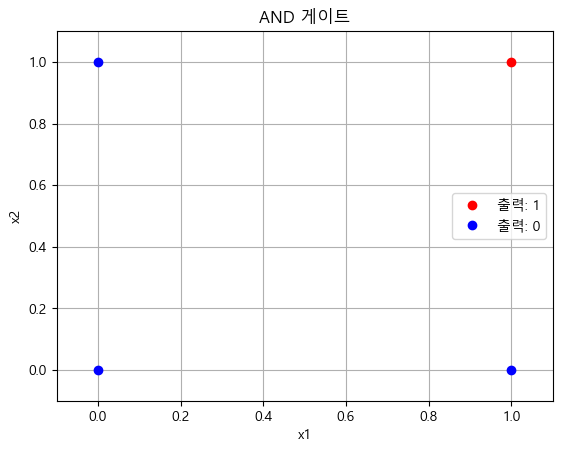

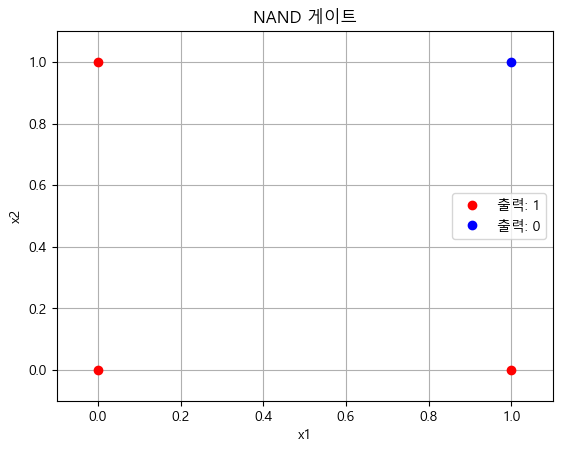

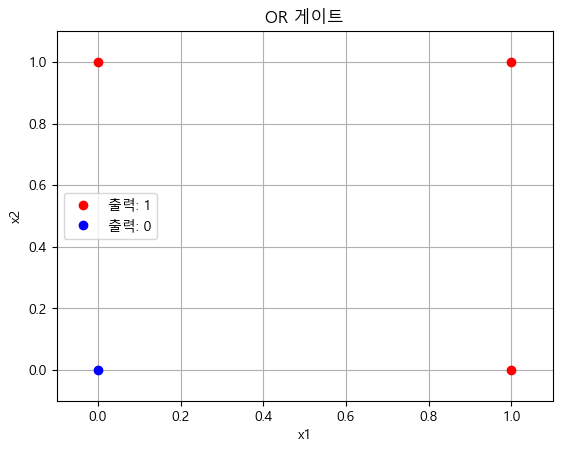

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_perceptron_gate(w1, w2, b, title):
    # 그림과 축 정의
    fig, ax = plt.subplots()
    
    # 결정 경계 그리기
    x = np.linspace(-0.1, 1.1, 200)
    y = (b - w1 * x) / w2
    
    # 입력 포인트 그리기
    points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = (w1 * points[:, 0] + w2 * points[:, 1] + b > 0).astype(int)
    
    output_1_points = []
    output_0_points = []
    for point, label in zip(points, labels):
        if label:
            output_1_points.append(point)
        else:
            output_0_points.append(point)
    
    output_1_points = np.array(output_1_points)
    output_0_points = np.array(output_0_points)
    
    if len(output_1_points) > 0:
        ax.plot(output_1_points[:, 0], output_1_points[:, 1], 'ro', label='출력: 1')
    if len(output_0_points) > 0:
        ax.plot(output_0_points[:, 0], output_0_points[:, 1], 'bo', label='출력: 0')
    
    # 축 한계 설정
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    
    # 그리드, 레이블 및 제목 추가
    ax.grid(True)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)
    
    # 범례 표시
    ax.legend()
    
    plt.show()

# AND 게이트
plot_perceptron_gate(1, 1, -1.5, 'AND 게이트')

# NAND 게이트
plot_perceptron_gate(-1, -1, 1.5, 'NAND 게이트')

# OR 게이트
plot_perceptron_gate(1, 1, -0.5, 'OR 게이트')


# 계단 함수 구현

In [15]:
x=np.array([-1.0,1.0,2.0])
x
y=x>0
y

y= y.astype(int) 
y

array([0, 1, 1])

# 계단 함수의 그래프

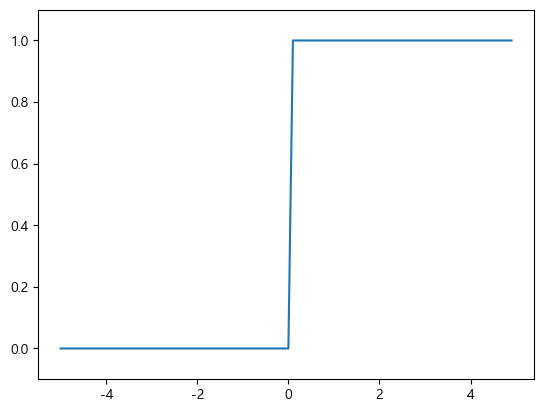

In [9]:
def step_function(x):
    return np.array(x>0,dtype=int)
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)  # 보여질 y축 범위 지정
plt.show()

# 시그모이드 함수

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [11]:
x=np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

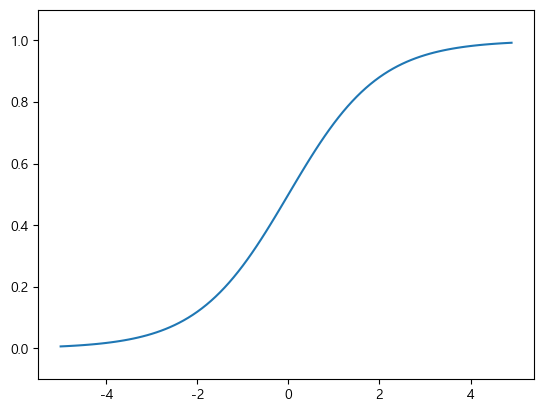

In [12]:

x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)  # 보여질 y축 범위 지정
plt.show()


# Relu함수: 0이하면 0을 출력, 0을 넘으면 입력값을 그대로출력

In [18]:
def relu(x):
    return np.maximum(0,x)
relu(-2)

0

# 시그모이드 VS ReLU
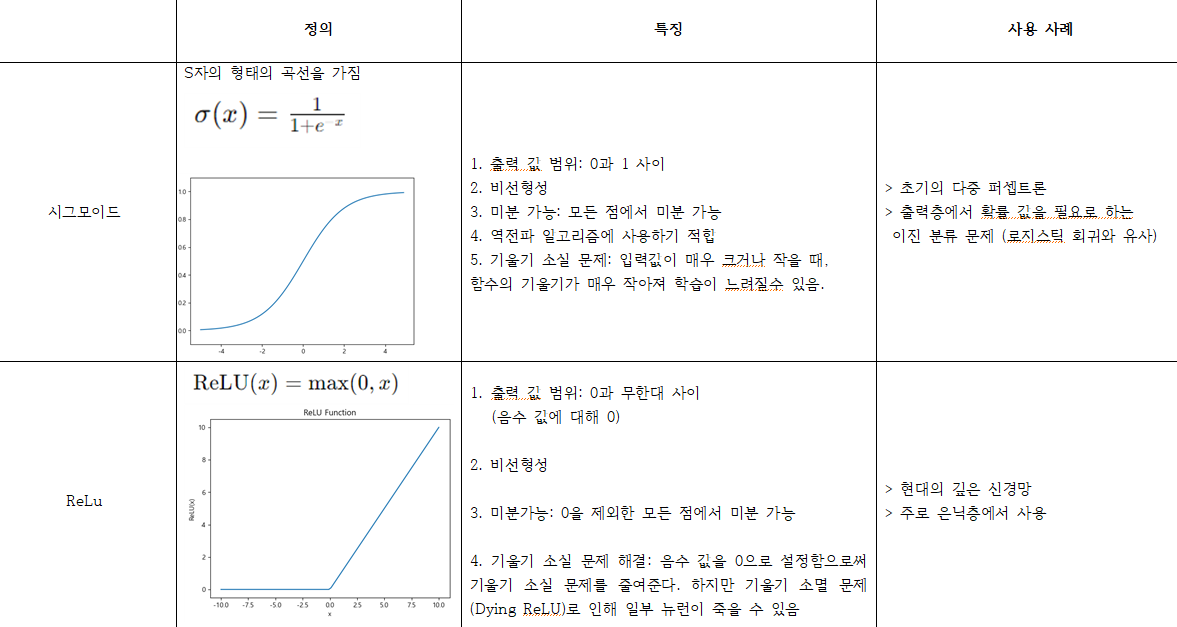

> ReLU는 현대의 딥러닝 모델에서 널리 사용되며, 특히 은닉층에서 중요한 역할을 함 <BR>
  학습 속도와 성능 면에서 많은 이점을 제공하기 때문에 대부분의 딥러닝 아키텍처에서 표준으로 채택됨<BR><BR>

> 시그모이드는 주로 <span style="color:red">출력층에서</span> 사용되며, 이진 분류 문제에서 출력 값을 확률로 해석할 수 있는 경우에 유용<br>
  기울기 소실 문제로 인해 깊은 신경망에서는 잘 사용되지 않음